In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

In [2]:
from src.utils.data_utils import load_datasets
train_ds, val_ds, test_ds = load_datasets()

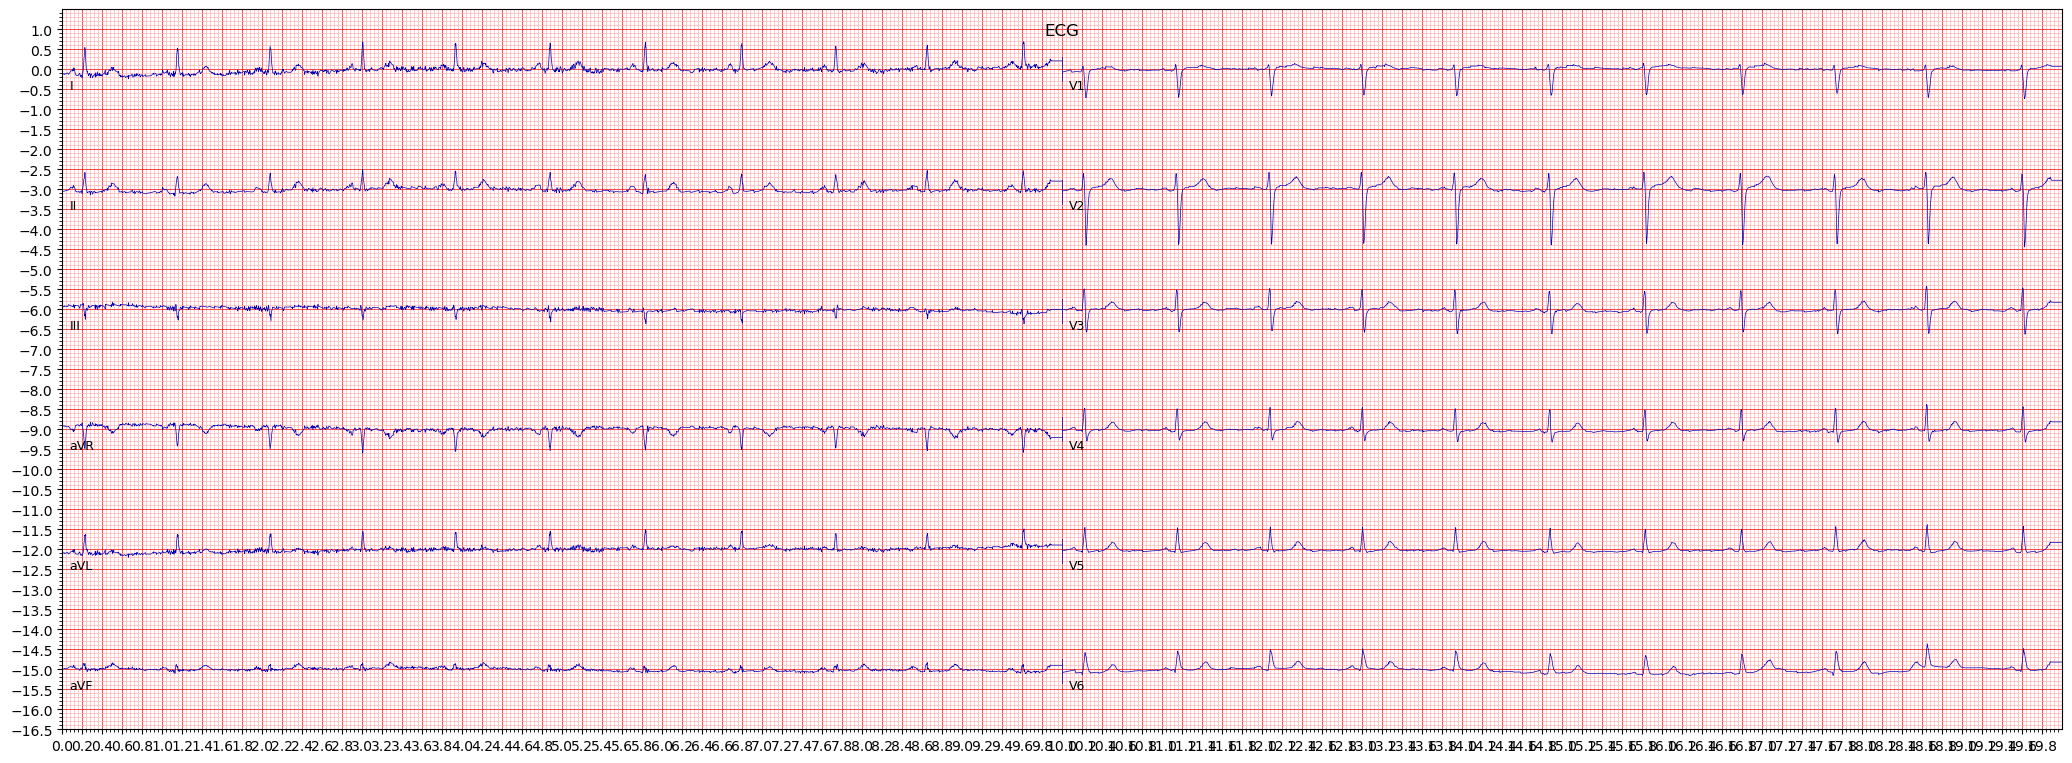

In [38]:
ecg = train_ds.find_ecg_with_subclass('NORM', 0)
ecg.show_with_grid()

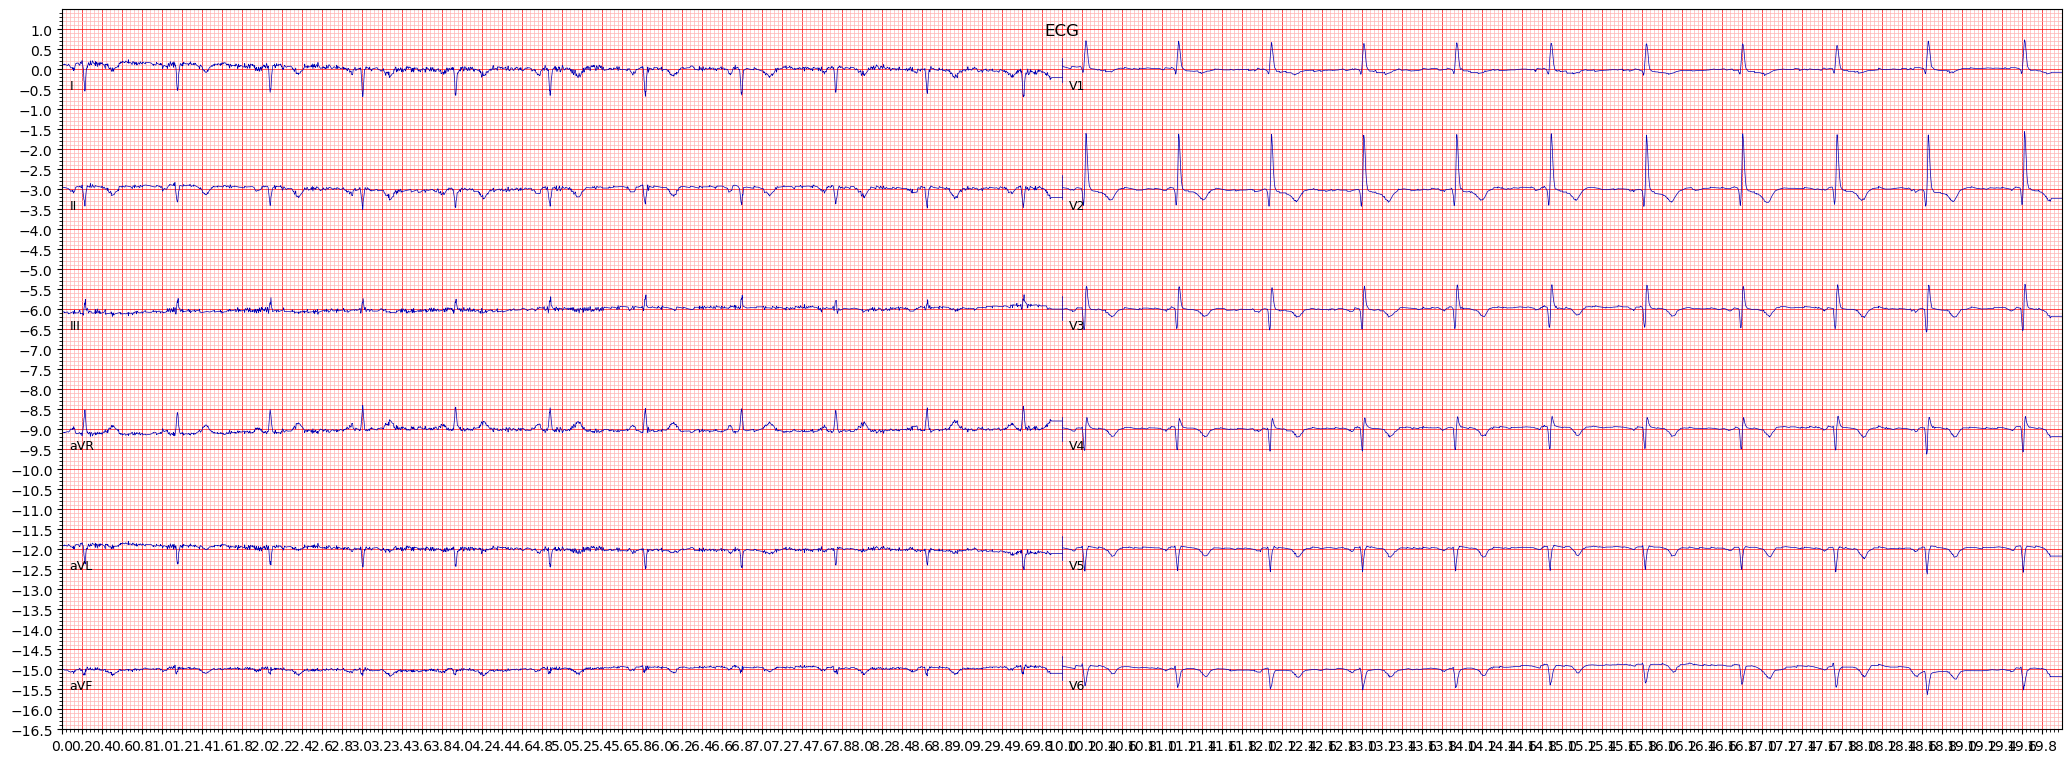

In [39]:
inverted_ecg = ecg.invert()
inverted_ecg.show_with_grid()

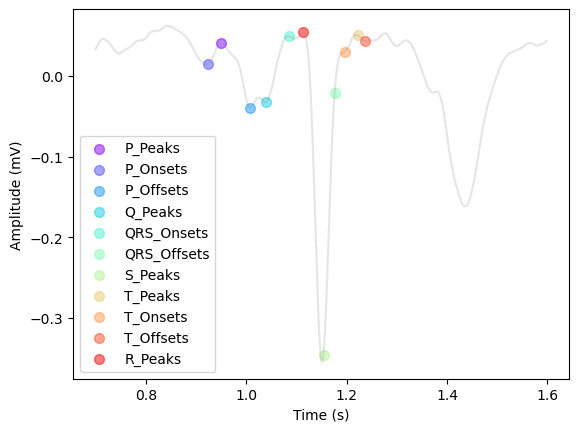

In [35]:
ecg.plot_delineation(lead='aVR')

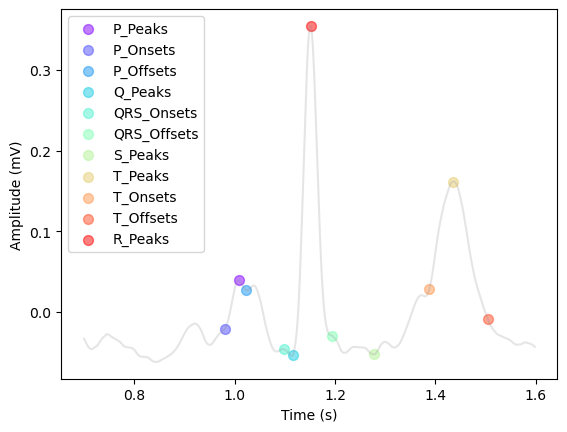

In [40]:
inverted_ecg.plot_delineation(lead='aVR')

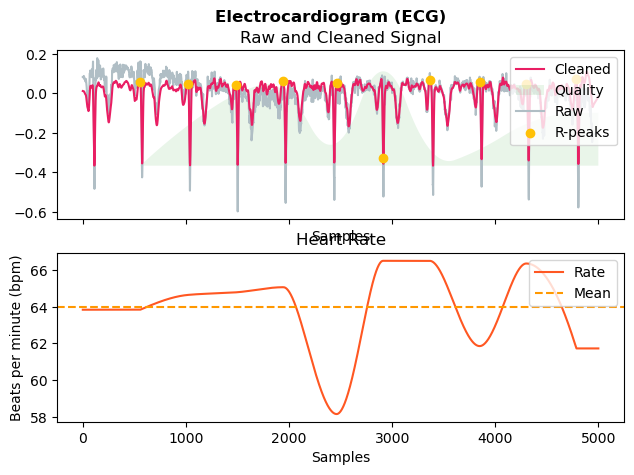

In [41]:
_, _ = ecg.process_and_plot(lead='aVR')

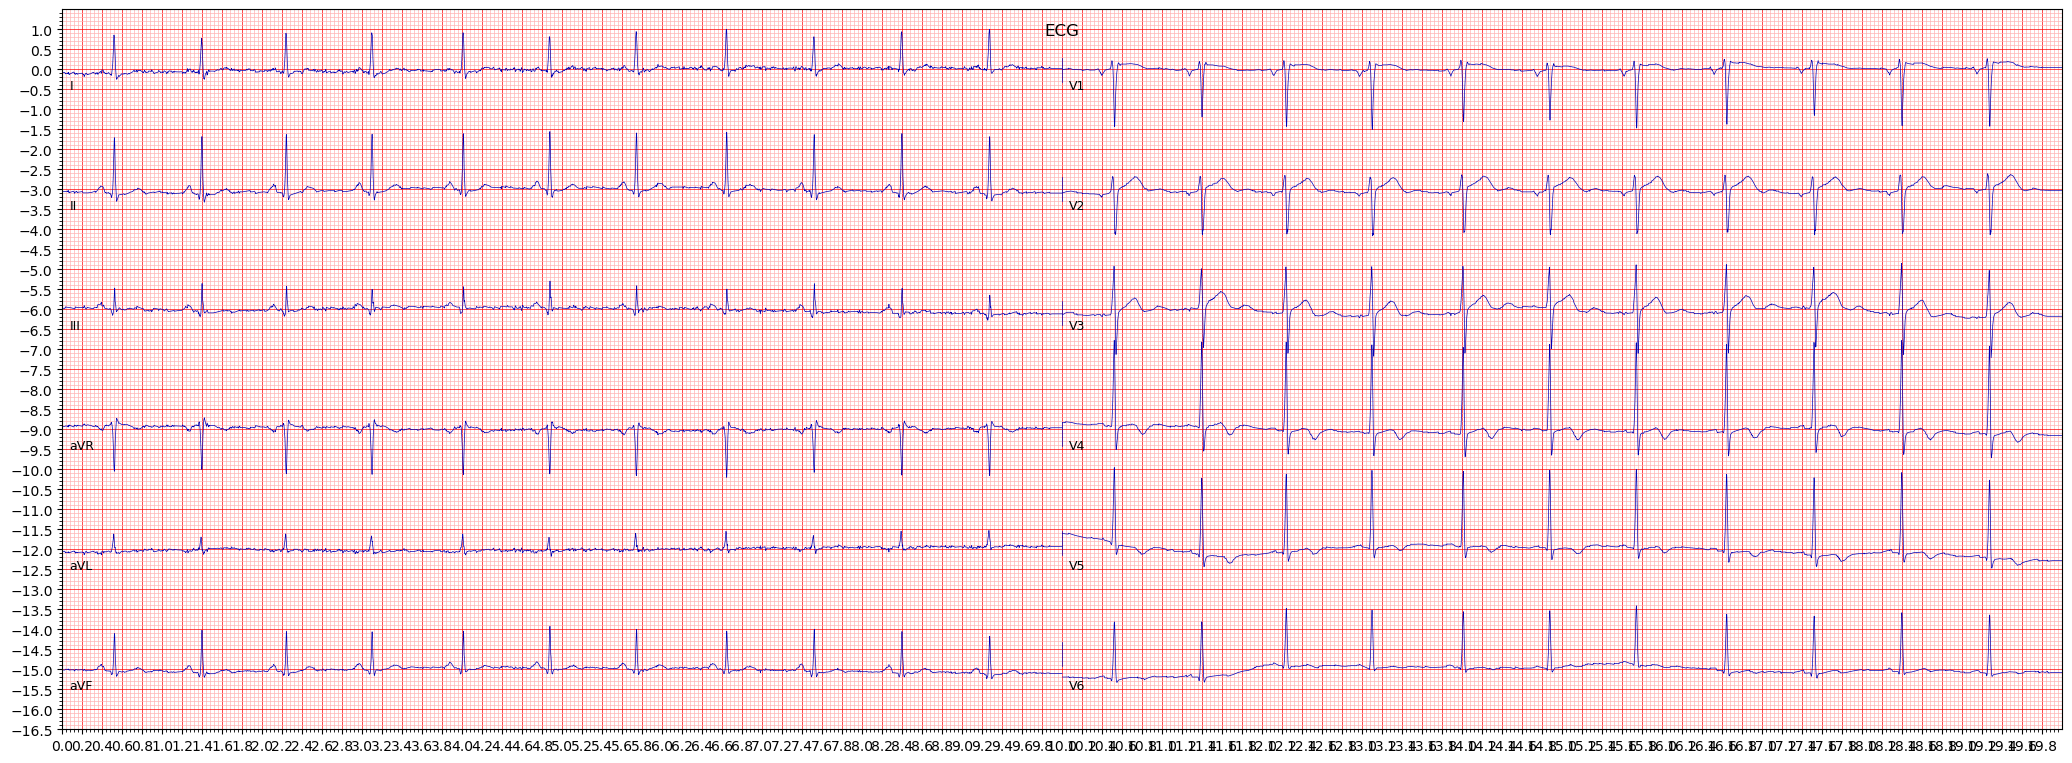

In [51]:
ecg = train_ds.find_ecg_with_subclass('MI', 30)
ecg.show_with_grid()

In [53]:
ecg.labels

['LMI', 'INVT', 'IRBBB', 'AMI', 'SR']

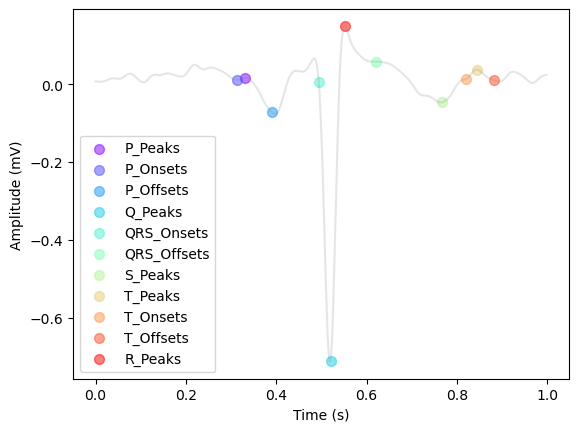

In [147]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='aVR', window_range=(0, 1))

Checking for inverted T and P waves...
Checking for inverted T waves...
Checking for inverted P waves...


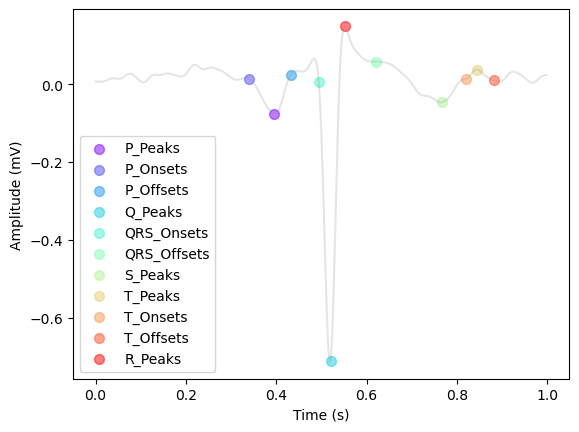

In [148]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='aVR', window_range=(0, 1))

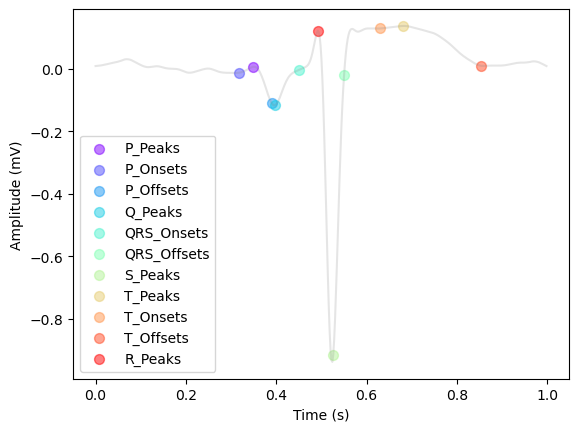

In [146]:
# ecg.delineations = None
ecg.delineate(check_P_inversion=False, check_T_inversion=False)
ecg.plot_delineation(lead='V1', window_range=(0, 1))

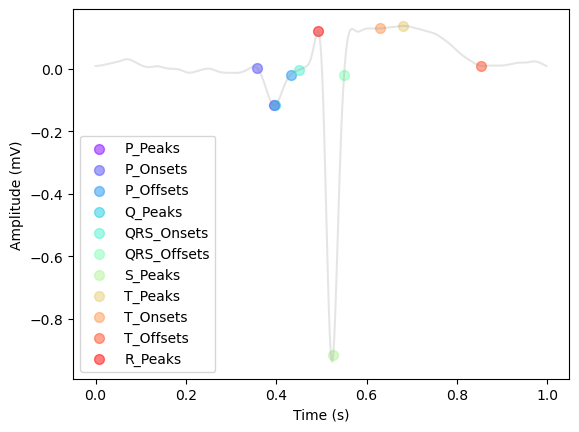

In [136]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V1', window_range=(0, 1))

In [133]:
def dic(d):
    l1 = len(d['ECG_T_Onsets'].to_numpy().nonzero()[0])
    l2 = len(d['ECG_T_Peaks'].to_numpy().nonzero()[0])
    l3 = len(d['ECG_T_Offsets'].to_numpy().nonzero()[0])
    l4 = len(d['ECG_P_Onsets'].to_numpy().nonzero()[0])
    l5 = len(d['ECG_P_Peaks'].to_numpy().nonzero()[0])
    l6 = len(d['ECG_P_Offsets'].to_numpy().nonzero()[0])
    l8 = len(d['ECG_Q_Peaks'].to_numpy().nonzero()[0])
    l10 = len(d['ECG_R_Onsets'].to_numpy().nonzero()[0])
    l12 = len(d['ECG_R_Offsets'].to_numpy().nonzero()[0])
    l14 = len(d['ECG_S_Peaks'].to_numpy().nonzero()[0])
    print(l1, l2, l3, l4, l5, l6, l8, l10, l12, l14)
dic(ecg.delineations[7])

11 11 11 10 11 11 11 11 11 11


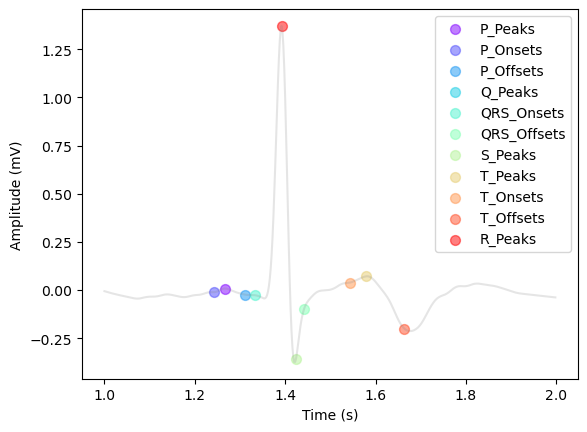

In [152]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='V4', window_range=(1, 2))

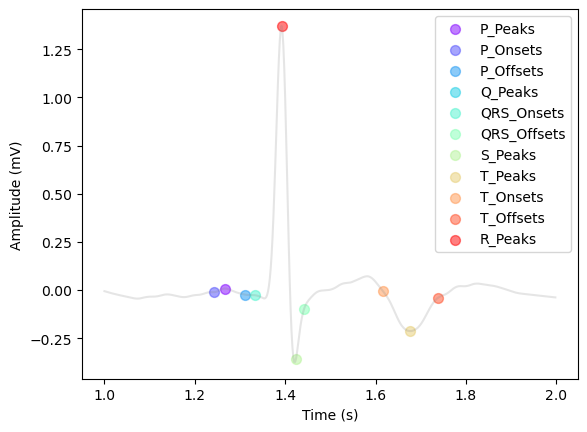

In [153]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V4', window_range=(1, 2))

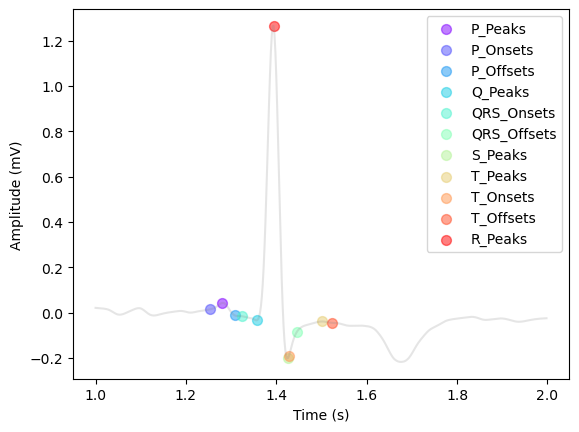

In [154]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='V5', window_range=(1, 2))

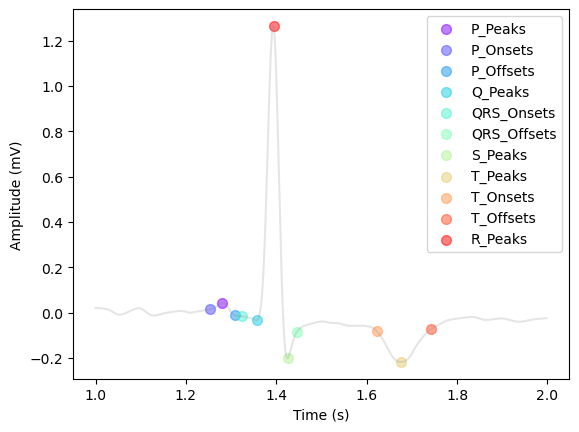

In [155]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V5', window_range=(1, 2))